In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import xlrd

filename = "2010_sample_values.xlsx"
peoes = "30 Dias_Peões.xlsx"
acidentes = "30 Dias_Acidentes.xlsx"
passag = "30 Dias_Passag.xlsx"
cond_veic = "30 Dias_Cond_Veic.xlsx"

def read_file():
    xlsx = pd.ExcelFile(filename)
    for sheet_name in xlsx.sheet_names:
        appended_data=[]
        df = pd.read_excel(filename,sheet_name=sheet_name)
        appended_data.append(df)
        appended_data = pd.concat(appended_data)
        appended_data.to_excel(sheet_name+'.xlsx')

def open_sheet(sheet_name):
    return pd.read_excel(sheet_name)

def getSample():
    df=open_sheet("mergedFiles.xlsx")
    df = df.drop(df.columns[[0]], axis=1)
    df.sample(n = 10000)

def get1000OfExcell(name):
    df=open_sheet(name)
    #df = df.drop(df.columns[[0]], axis=1)
    return df.sample(n = 1000)

def teste():
    df=open_sheet("2010Acidentes.xlsx")
    for x in range(len(df)):
        value=df.loc[x,"Datahora"]
        df.loc[x,"Mês"]=value.split(":")[1]
        df.loc[x,"Hora"]=value.split(" ")[1]
        df.loc[x,"Datahora"]=value.split(":")[0]
    return df


def concatenateAll():
    a2010=get1000OfExcell("2010Acidentes.xlsx")
    a2011=get1000OfExcell("2011Acidentes.xlsx")
    a2012=get1000OfExcell("2012Acidentes.xlsx")
    a2013=get1000OfExcell("2013Acidentes.xlsx")
    a2014=get1000OfExcell("2014Acidentes.xlsx")
    a2015=get1000OfExcell("2015Acidentes.xlsx")
    a2016=get1000OfExcell("2016Acidentes.xlsx")
    a2017=get1000OfExcell("2017Acidentes.xlsx")
    a2018=get1000OfExcell("2018Acidentes.xlsx")
    a2019=get1000OfExcell("2019Acidentes.xlsx")
    frames = [a2010, a2011, a2012,a2013,a2014,a2015,a2016,a2017,a2018,a2019]
    result = pd.concat(frames)
    result.to_excel("pedro_10000.xlsx")
    print(result)



In [24]:
teste()

,Id. Acidente,Datahora,Dia,Mês,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,Latitude GPS,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
0,2010442610,2010,1900-01-01,01,2022-12-13 00:05:00,Guarda Nacional Republicana,50.0,50.0,Sexta-Feira,"38,93275",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Sem berma ou impraticável,No passeio,Direita
1,2010442441,2010,1900-01-01,01,2022-12-13 00:30:00,Guarda Nacional Republicana,120.0,120.0,Sexta-Feira,"41,185697",...,Inexistentes,No sentido crescente da quilometragem,Outros,Inexistentes,Betuminoso,Curva,Com inclinação,Berma não pavimentada,Em plena via,Direita
2,2010422349,2010,1900-01-01,01,2022-12-13 00:35:00,Polícia de Segurança Pública,50.0,50.0,Sexta-Feira,"0,00",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,No passeio,Direita
3,2010439194,2010,1900-01-01,01,2022-12-13 00:40:00,Guarda Nacional Republicana,70.0,90.0,Sexta-Feira,"40,701323",...,Inexistentes,NÃO DEFINIDO,Outros,A funcionar normalmente,Betuminoso,Recta,Com inclinação,Berma pavimentada,Em plena via,Direita
4,2010442390,2010,1900-01-01,01,2022-12-13 00:40:00,Guarda Nacional Republicana,50.0,50.0,Sexta-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Com inclinação,Berma pavimentada,Na berma,Direita
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35421,2011511405,2010,1900-01-31,12,2022-12-13 21:40:00,Guarda Nacional Republicana,120.0,120.0,Sexta-Feira,"38,771405",...,Inexistentes,No sentido crescente da quilometragem,NÃO DEFINIDO,Inexistentes,Betuminoso,Recta,Em patamar,Berma pavimentada,Em plena via,Central
35422,2011499653,2010,1900-01-31,12,2022-12-13 21:45:00,Polícia de Segurança Pública,80.0,100.0,Sexta-Feira,"0,00",...,Inexistentes,No sentido decrescente da quilometragem,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Em plena via,Esquerda
35423,2011512688,2010,1900-01-31,12,2022-12-13 22:50:00,Guarda Nacional Republicana,50.0,90.0,Sexta-Feira,NaN,...,Inexistentes,NÃO DEFINIDO,Stop,Inexistentes,Betuminoso,Recta,Em patamar,Sem berma ou impraticável,Em plena via,Direita
35424,2011499984,2010,1900-01-31,12,2022-12-13 23:25:00,Polícia de Segurança Pública,50.0,50.0,Sexta-Feira,"0,00",...,Inexistentes,NÃO DEFINIDO,NÃO DEFINIDO,Inexistentes,Betuminoso,Curva,Em patamar,Berma pavimentada,Na berma,Direita


In [25]:
s="2010:01:01 00:05:00"
print(s.split(" "))

['2010:01:01', '00:05:00']


In [6]:
concatenateAll()

       Id. Acidente             Datahora        Dia        Mês  \
14525    2010468428  2010:06:09 14:00:00 1900-01-09 1900-06-01   
23002    2010474545  2010:09:02 12:10:00 1900-01-02 1900-09-01   
4048     2010434953  2010:02:15 13:40:00 1900-01-15 1900-02-01   
13430    2010463406  2010:05:29 20:10:00 1900-01-29 1900-05-01   
16243    2011501994  2010:06:28 08:45:00 1900-01-28 1900-06-01   
...             ...                  ...        ...        ...   
22270   20191756734  2019:08:22 17:20:00 1900-01-22 1900-08-01   
11429   20191734433  2019:05:08 13:45:00 1900-01-08 1900-05-01   
18014   20191769457  2019:07:14 12:15:00 1900-01-14 1900-07-01   
3461    20191661496  2019:02:08 17:55:00 1900-01-08 1900-02-01   
7485    20191669277  2019:03:25 19:30:00 1900-01-25 1900-03-01   

                     Hora      Entidades Fiscalizadoras  Velocidade local  \
14525 1900-01-01 14:00:00   Guarda Nacional Republicana              40.0   
23002 1900-01-01 12:10:00  Polícia de Segurança Públi

In [4]:
def changeEstacoesTempo():
    df=open_sheet("10000_sample_features_removidas.xlsx")
    print("JA LI")
    for x in range(len(df)):
        print(x)
        value=int(df.loc[x,"Mês"])
        if 4 <= value <= 6:
            estacao="Primavera"
        elif 7 <= value <= 9:
            estacao="Verão"
        elif 10 <= value <= 12:
            estacao="Outono"
        else:
            estacao="Inverno"
        df.loc[x,"Mês"]=estacao
    df.to_excel("pedro_4estacoes.xlsx")

def calcPartofDay(m,a,n,hour):
    if m<=hour<=a:
        part_of_day="Manhã"
    elif a<=hour<=n:
        part_of_day="Tarde"
    else:
        part_of_day="Noite"
    return part_of_day

def changeToMorning_Afternoon_Night():
    df=open_sheet("pedro_4estacoes.xlsx")
    print("LI")
    for x in range(len(df)):
        print(x)
        station=(df.loc[x,"Mês"])
        hourC=(df.loc[x,"Hora"])
        hour=int(hourC.split(":")[0])
        if station=="Primavera":
            part_of_day= calcPartofDay(6,13,20,hour)
        elif station=="Verão":
            part_of_day= calcPartofDay(6,13,21,hour)
        elif station=="Outono":
            part_of_day= calcPartofDay(8,13,18,hour)
        else:
            part_of_day= calcPartofDay(8,13,27,hour)
        print(part_of_day)
        df.loc[x,"Hora"]=part_of_day
    df.to_excel("pedropartesdoDia.xlsx")



#SER DIA DE SEMANA OU N
def changeTypeOfNature():
    df=open_sheet("sample_features_removidas.xlsx")
    for x in range(len(df)):
        natureza=(df.loc[x,"Natureza"])
        splited=natureza.split(" ")[0]
        df.loc[x,"Natureza"]=splited
    df.to_excel("pedroNatureza.xlsx")







In [5]:
changeTypeOfNature()

In [1]:
sed="08:20:00"
print(sed.split(":"[0]))

['08', '20', '00']


In [18]:
changeToMorning_Afternoon_Night()

LI
0
Manhã
1
Manhã
2
Tarde
3
Manhã
4
Manhã
5
Tarde
6
Noite
7
Manhã
8
Manhã
9
Tarde
10
Tarde
11
Tarde
12
Manhã
13
Manhã
14
Manhã
15
Tarde
16
Noite
17
Tarde
18
Tarde
19
Tarde
20
Tarde
21
Manhã
22
Noite
23
Tarde
24
Tarde
25
Manhã
26
Manhã
27
Manhã
28
Tarde
29
Noite
30
Tarde
31
Tarde
32
Noite
33
Manhã
34
Tarde
35
Noite
36
Manhã
37
Tarde
38
Tarde
39
Tarde
40
Manhã
41
Tarde
42
Tarde
43
Manhã
44
Tarde
45
Tarde
46
Manhã
47
Manhã
48
Manhã
49
Tarde
50
Manhã
51
Tarde
52
Tarde
53
Manhã
54
Tarde
55
Tarde
56
Manhã
57
Manhã
58
Noite
59
Manhã
60
Tarde
61
Manhã
62
Tarde
63
Noite
64
Tarde
65
Manhã
66
Tarde
67
Tarde
68
Manhã
69
Tarde
70
Noite
71
Manhã
72
Tarde
73
Manhã
74
Tarde
75
Tarde
76
Tarde
77
Tarde
78
Tarde
79
Manhã
80
Noite
81
Tarde
82
Manhã
83
Tarde
84
Tarde
85
Manhã
86
Tarde
87
Manhã
88
Tarde
89
Tarde
90
Tarde
91
Tarde
92
Tarde
93
Manhã
94
Tarde
95
Tarde
96
Tarde
97
Tarde
98
Tarde
99
Tarde
100
Noite
101
Manhã
102
Tarde
103
Tarde
104
Manhã
105
Tarde
106
Noite
107
Manhã
108
Noite
109
Noite
110
Man

In [3]:
df=open_sheet("transformado_10000_sample.xlsx")
df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

,Unnamed: 0,Id. Acidente,Datahora,Dia,Estação do Ano,Hora,Entidades Fiscalizadoras,Velocidade local,Velocidade geral,Dia da Semana,...,Obstáculos,Sentidos,Sinais,Sinais Luminosos,Tipo Piso,Traçado 1,Traçado 2,Traçado 3,Traçado 4,Via Trânsito
Unnamed: 0,1.000000,1.000000,0.994987,0.012084,0.102307,0.018017,0.032743,0.041663,0.026687,-0.008467,...,-0.048303,0.032133,-0.063889,-0.045460,0.013652,-0.019354,-0.057409,-0.066617,-0.029475,-0.031815
Id. Acidente,1.000000,1.000000,0.994987,0.012084,0.102307,0.018017,0.032743,0.041663,0.026687,-0.008467,...,-0.048303,0.032133,-0.063889,-0.045460,0.013652,-0.019354,-0.057409,-0.066617,-0.029475,-0.031815
Datahora,0.994987,0.994987,1.000000,0.013062,0.005625,0.017590,0.034540,0.042127,0.026989,-0.008849,...,-0.047954,0.029775,-0.063513,-0.045553,0.014026,-0.019778,-0.059392,-0.064907,-0.030363,-0.031146
Dia,0.012084,0.012084,0.013062,1.000000,-0.005581,0.006814,-0.001110,-0.010755,0.001532,0.010341,...,0.006448,0.005386,0.003128,0.009107,-0.002162,0.012621,0.012668,0.019507,-0.001165,-0.012166
Estação do Ano,0.102307,0.102307,0.005625,-0.005581,1.000000,0.005977,-0.016144,0.002303,0.001025,0.000209,...,-0.004680,0.025775,-0.006824,-0.001007,-0.001351,0.008892,0.013858,-0.020172,0.010880,-0.011769
Hora,0.018017,0.018017,0.017590,0.006814,0.005977,1.000000,0.000034,-0.009212,-0.005223,-0.034142,...,0.022063,0.002273,0.003474,-0.004868,0.007515,-0.019604,0.003029,0.010574,-0.011741,0.002324
Entidades Fiscalizadoras,0.032743,0.032743,0.034540,-0.001110,-0.016144,0.000034,1.000000,0.081648,0.099034,-0.037077,...,0.037635,0.049455,0.207146,0.157904,-0.004173,-0.074576,0.093287,-0.017769,-0.079759,0.127938
Velocidade local,0.041663,0.041663,0.042127,-0.010755,0.002303,-0.009212,0.081648,1.000000,0.657404,0.005201,...,0.019626,0.373990,0.037529,-0.003858,0.014919,-0.005528,0.009201,0.027791,-0.008153,0.173735
Velocidade geral,0.026687,0.026687,0.026989,0.001532,0.001025,-0.005223,0.099034,0.657404,1.000000,-0.012777,...,-0.005176,0.446035,0.042413,0.003324,0.003960,-0.010672,0.011905,0.040572,-0.055119,0.234872
Dia da Semana,-0.008467,-0.008467,-0.008849,0.010341,0.000209,-0.034142,-0.037077,0.005201,-0.012777,1.000000,...,-0.020768,0.005338,-0.002703,-0.008932,0.003545,0.022842,-0.000727,-0.001962,0.023602,-0.016306


In [41]:
import numpy as np
import seaborn as sn
import math
features_to_check = ['Hora','Velocidade geral', 'Velocidade local','Dia da Semana','Num. Mortos a 30 dias','Num. Feridos graves a 30 dias','Num. Feridos ligeiros a 30 dias',	'Características Tecnicas1',	'Cond Aderência',	'NUTS II','Tipos Vias',	'Estado Conservação','Factores Atmosféricos','Reg Circulação1',	'Intersecção Vias',	'Localizações',	'Luminosidade','Marca Via',	'Natureza','Tipo Piso',	'Traçado 1',	'Traçado 2',	'Traçado 3',	'Traçado 4',	'Via Trânsito', 'Estação do Ano']
def makeDistribuitionBar():
    df=open_sheet("transformado_10000_sample.xlsx")
    for wyd in features_to_check:
        zed=df[wyd].unique()
        new_array = [item for item in zed if not(pd.isnull(item)) == True]
        listX=[]
        listY=[]
        for x in new_array:
            df_test=df[df[wyd]==x].shape[0]
            listX.append(x)
            listY.append(df_test)
        fig = plt.figure(figsize = (20,20))
        ax1 = fig.add_subplot(2, 2, 1)
        ax1.bar(listX,listY)
        ax1.set_title(wyd)
        plt.show()




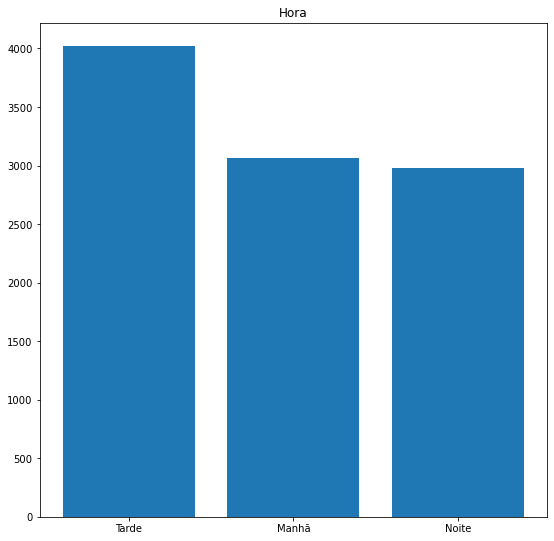

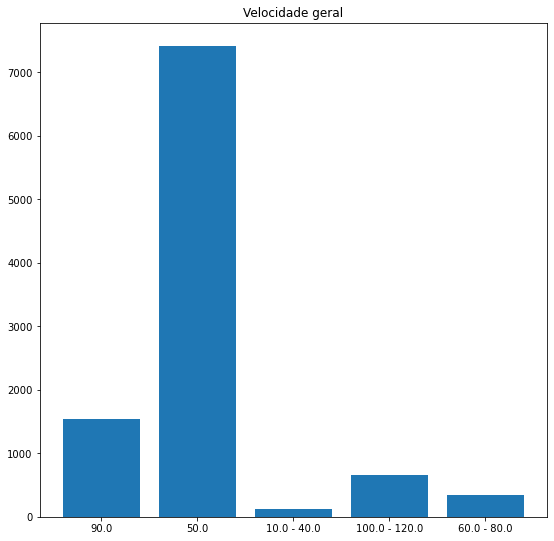

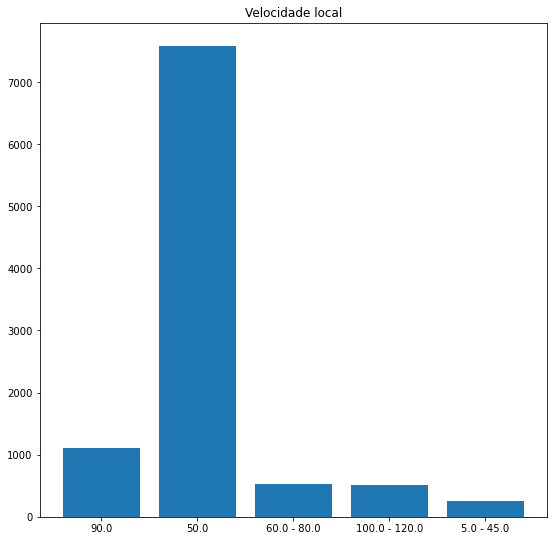

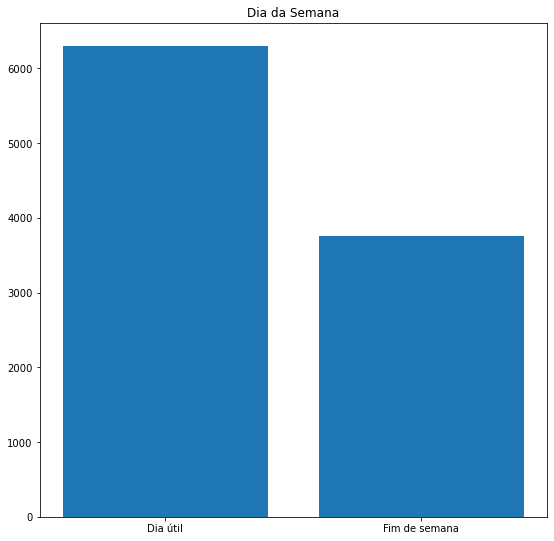

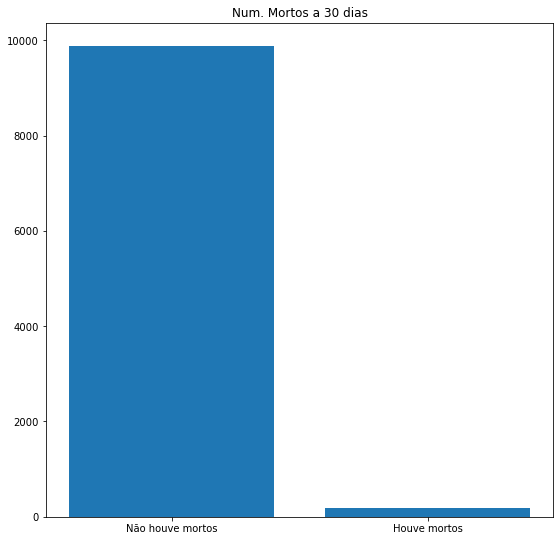

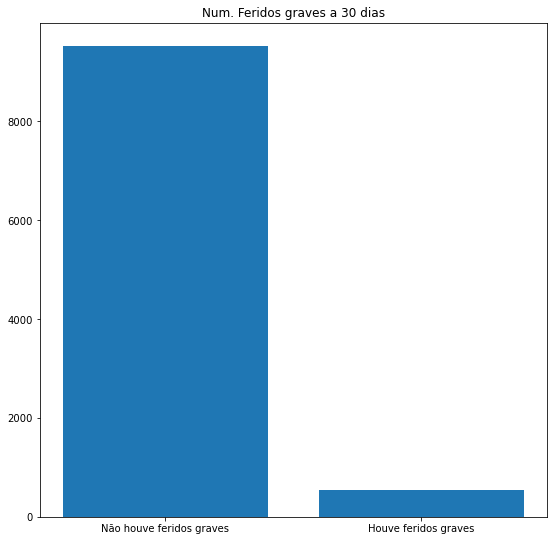

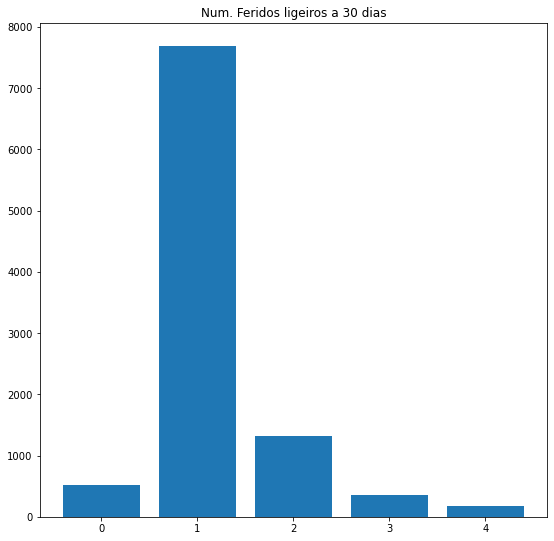

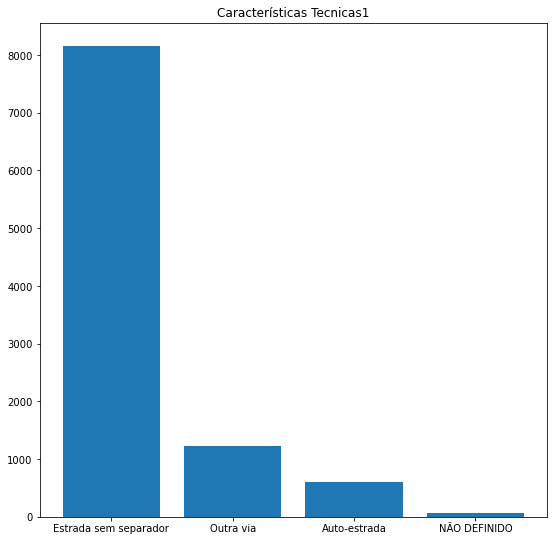

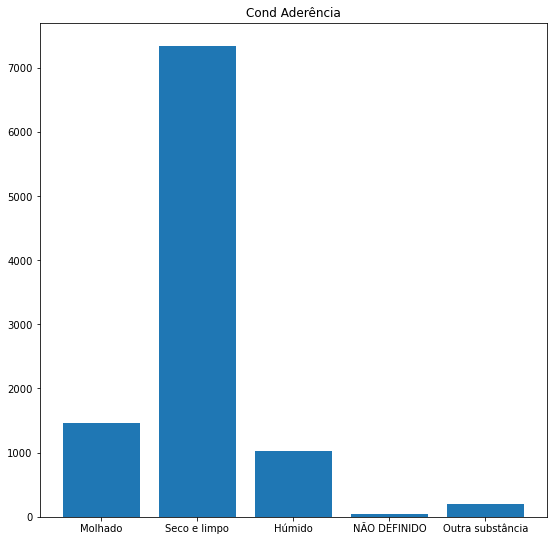

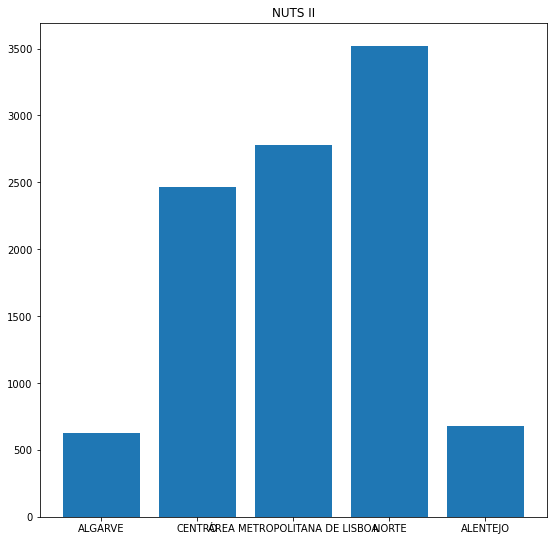

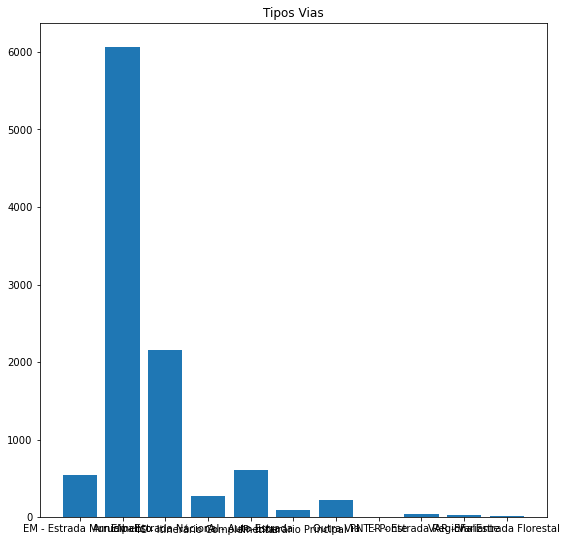

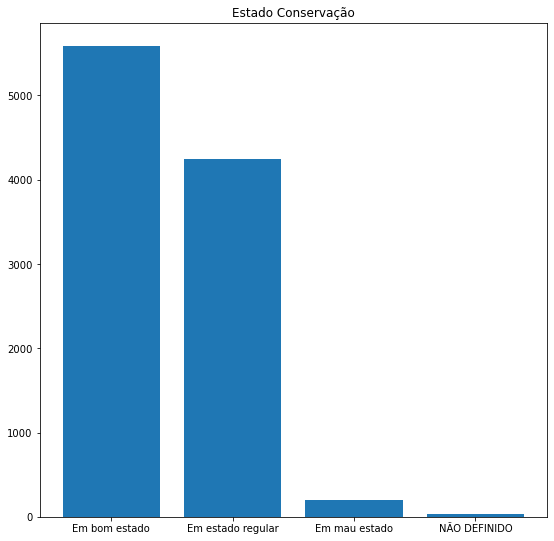

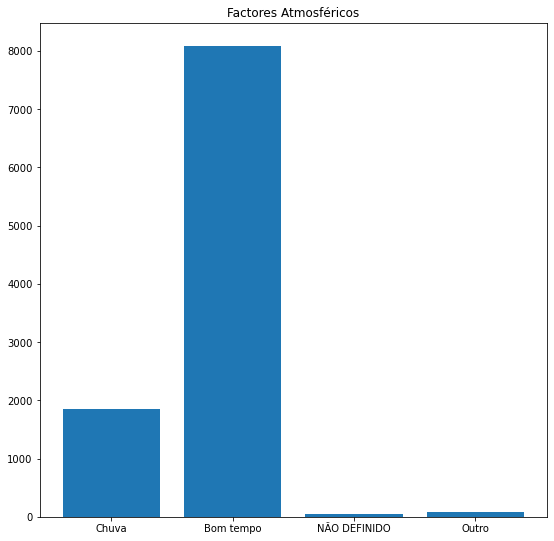

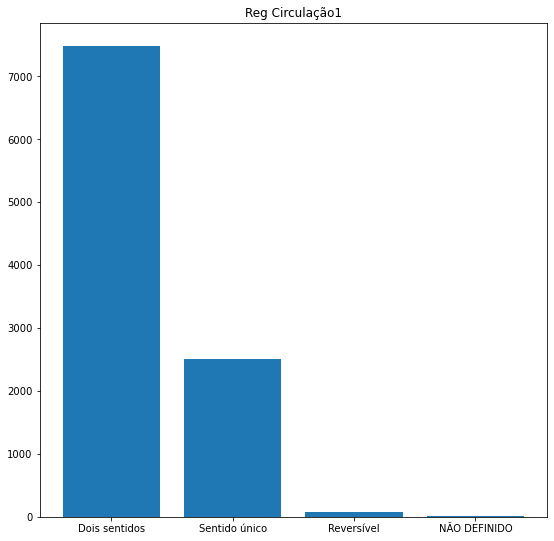

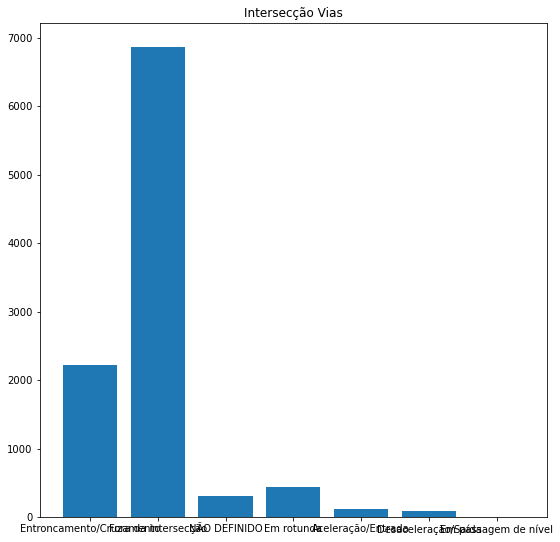

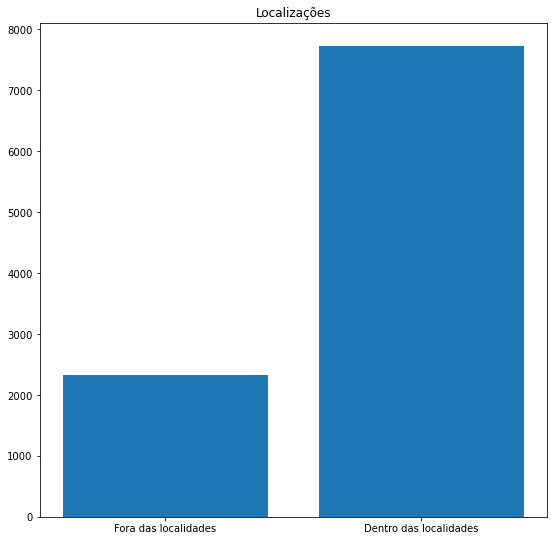

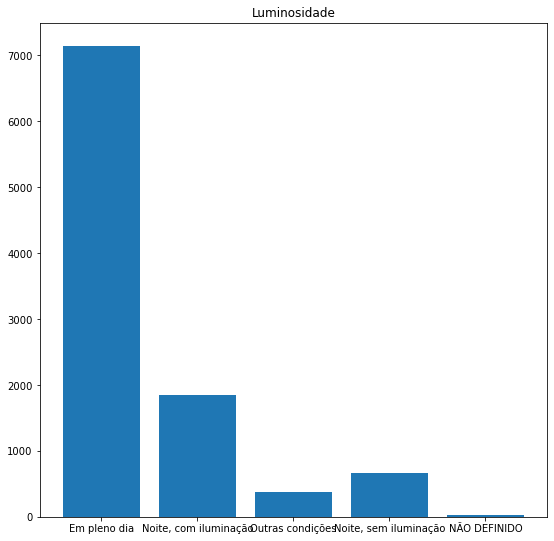

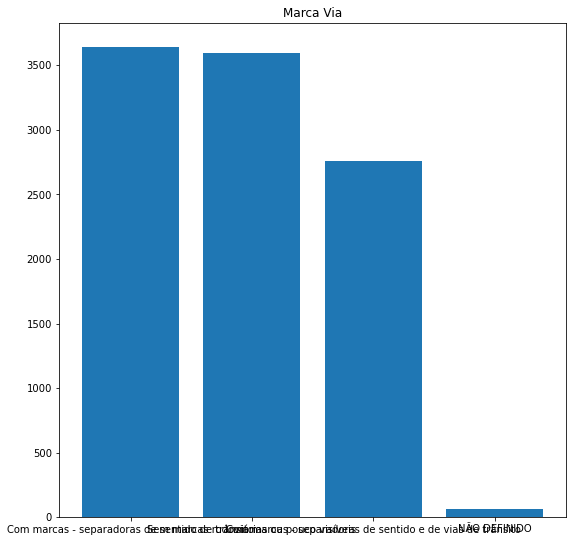

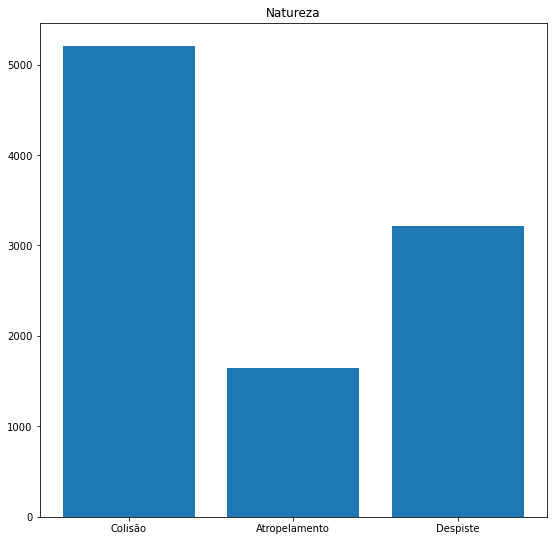

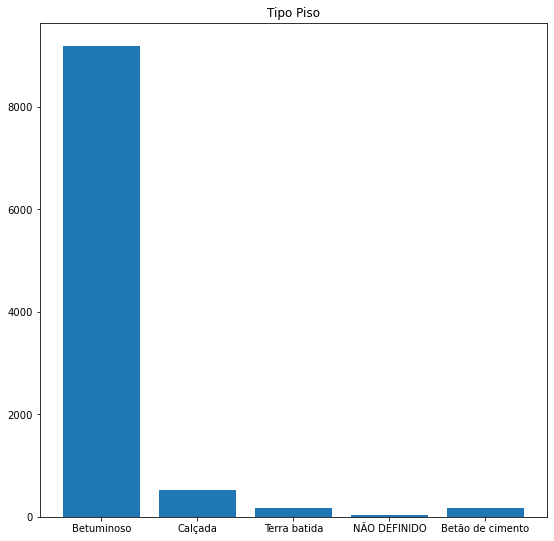

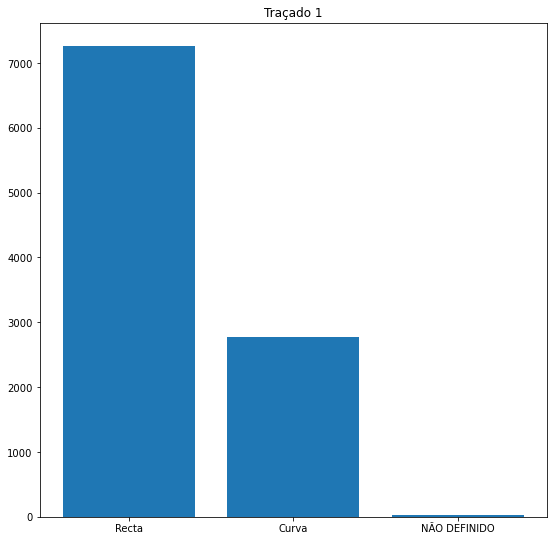

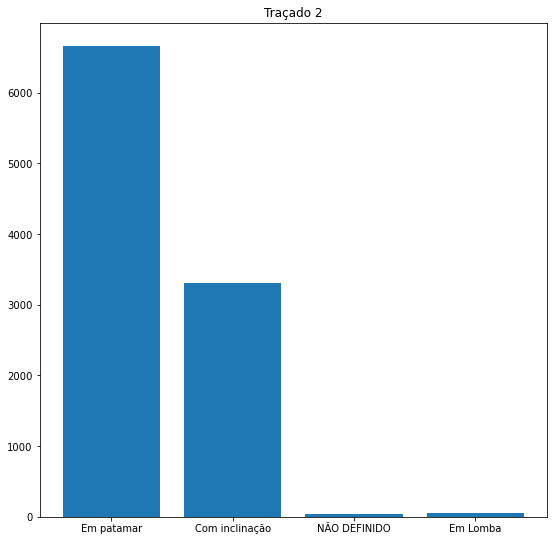

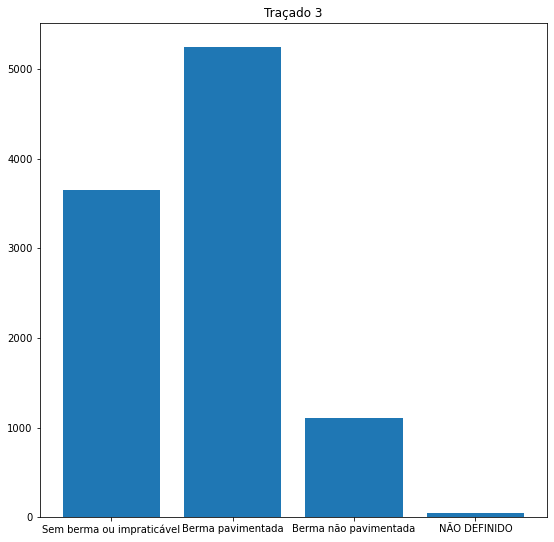

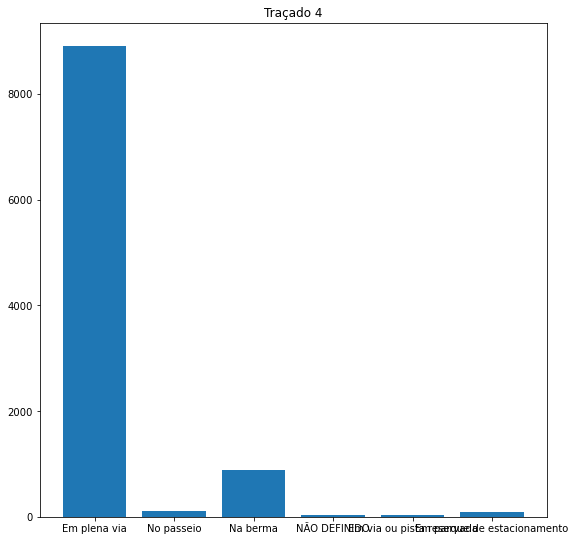

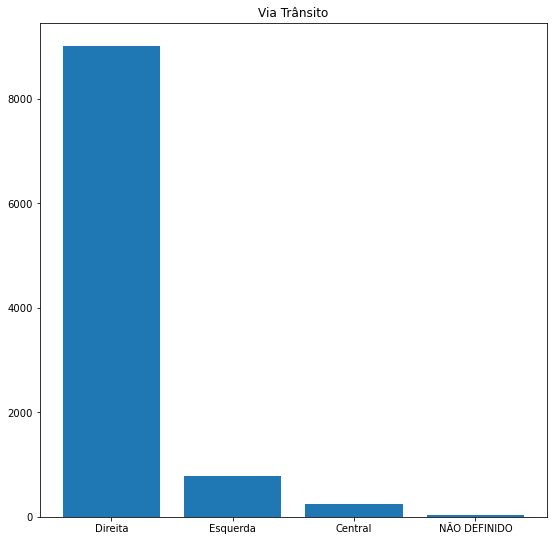

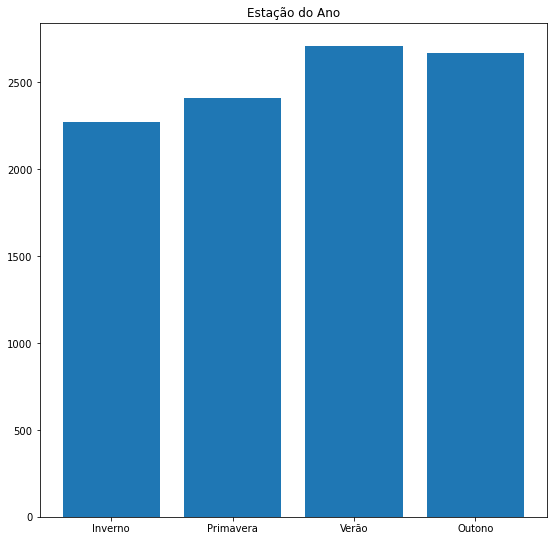

In [42]:
makeDistribuitionBar()